# Titanic Dataset Analysis

## Project Description

Titanic Dataset Analysis gives visual and findings about the various things associated with the passengers on Titanic. It contains information about passengers on the Titanic, including details like age, gender, class and whether they survived or not. 

## Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format='{:.2f}'.format

## Basis steps(load,info,null values,describe,etc.)

In [2]:
df=pd.read_csv('tested.csv')

In [3]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.50,0,0,330911,7.83,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,363272,7.00,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,240276,9.69,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.00,0,0,315154,8.66,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,1,1,3101298,12.29,NaN,S


In [4]:
df.shape

(418, 12)

There are 418 rows and 12 columns in the dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.00,418.00,418.00,332.00,418.00,418.00,417.00
mean,1100.50,0.36,2.27,30.27,0.45,0.39,35.63
std,120.81,0.48,0.84,14.18,0.90,0.98,55.91
min,892.00,0.00,1.00,0.17,0.00,0.00,0.00
25%,996.25,0.00,1.00,21.00,0.00,0.00,7.90
50%,1100.50,0.00,3.00,27.00,0.00,0.00,14.45
75%,1204.75,1.00,3.00,39.00,1.00,0.00,31.50
max,1309.00,1.00,3.00,76.00,8.00,9.00,512.33


## Is there any duplicate row in the dataset

In [7]:
df.duplicated().any()

False

## Is there any duplicate names in the dataset

In [8]:
df['Name'].duplicated().any()

False

In [9]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## checking null values in the dataset

In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

so, we have null values in age cabin and fare.

## Handling Null Values

In [11]:
avg_age=round(df['Age'].mean())
print(f'Average Age:{avg_age}')

Average Age:30


In [12]:
df['Age']=df['Age'].fillna(30)

In [13]:
mid_fare=round(df['Fare'].median())

In [14]:
df['Fare']=df['Fare'].fillna(mid_fare)

## Survived Analysis

### Changing 0 to Died and 1 to survived in survived column for better understanding

In [15]:
temp_d={
    0:'Died',
    1:'Survived'
}
df['Survived']=df['Survived'].map(temp_d)

In [16]:
df['Survived'].value_counts()

Survived
Died        266
Survived    152
Name: count, dtype: int64

There are 266 passengers who died and 152 passengers who survived.

Text(0.5, 1.0, 'Survival Count Data')

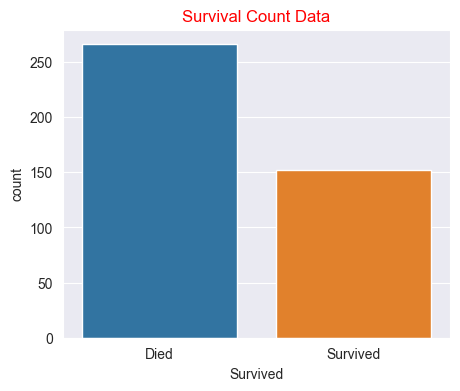

In [17]:
sns.set_style('darkgrid')
plt.figure(figsize=(5,4))
sns.countplot(data=df,x='Survived')
plt.title('Survival Count Data',color='red')

In [18]:
survival_sex=df.groupby(['Survived','Sex']).agg(
    count=('Sex','count')
)

In [19]:
survival_sex=survival_sex.reset_index()
survival_sex

,Survived,Sex,count
0,Died,male,266
1,Survived,female,152


<Axes: xlabel='Survived', ylabel='count'>

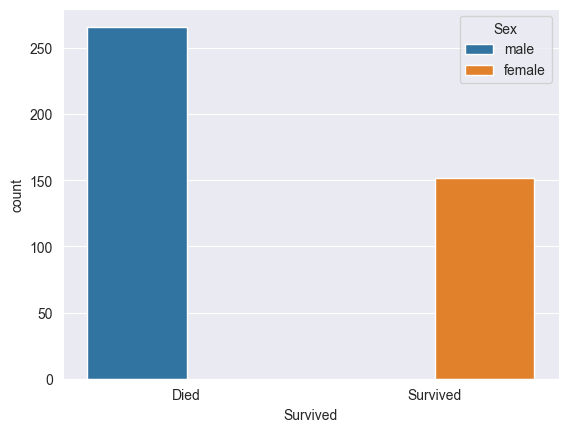

In [20]:
sns.barplot(data=survival_sex,x='Survived',y='count',hue='Sex')

## Sex Analysis

In [21]:
df['Sex'].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

There are 266 males and 152 females.

<Axes: xlabel='Sex', ylabel='count'>

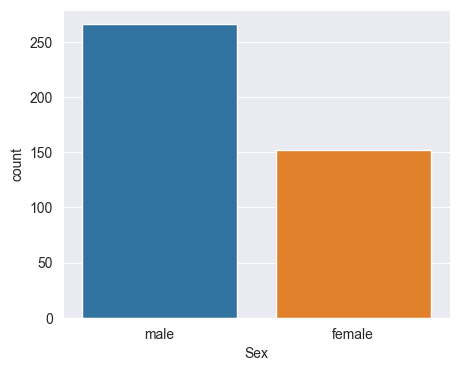

In [22]:
plt.figure(figsize=(5,4))
sns.countplot(data=df,x='Sex')

## Age-group Analysis

In [23]:
bins=[0,10,20,30,40,50,60,70,80]
range=['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79']
df['Age-range']=pd.cut(df['Age'],bins=bins,labels=range)

In [24]:
df['Age-range'].value_counts()

Age-range
20-29    217
30-39     55
10-19     47
40-49     46
0-9       22
50-59     20
60-69     10
70-79      1
Name: count, dtype: int64

<Axes: xlabel='Age-range', ylabel='count'>

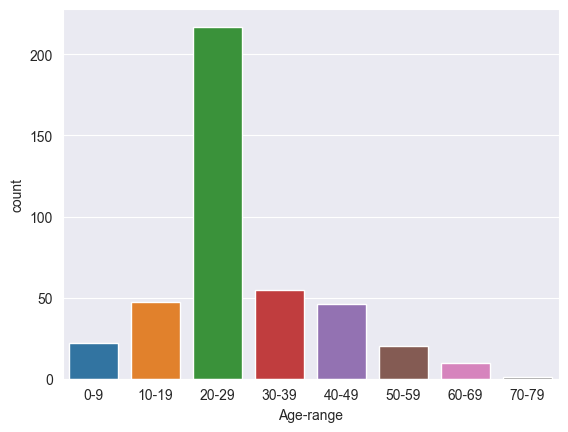

In [25]:
sns.countplot(data=df,x='Age-range')

## Fare Analysis

In [26]:
bins=[0,50,100,150,200,250,300]
fare_group=['0-50','50-100','100-150','150-200','200-250','250+']
df['Fares group']=pd.cut(df['Fare'],bins=bins,labels=fare_group)

## count as per the fare groups

In [27]:
df['Fares group'].value_counts()

Fares group
0-50       336
50-100      49
200-250     10
100-150      9
250+         7
150-200      4
Name: count, dtype: int64

Text(0.5, 1.0, 'Customer Count as per Fare Groups')

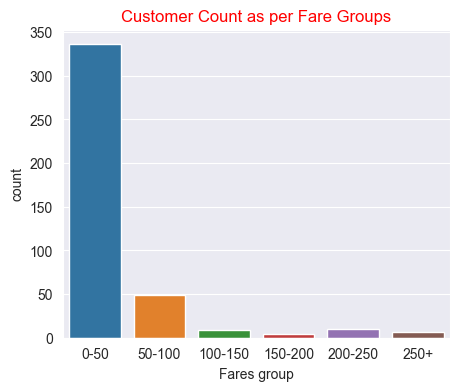

In [28]:
plt.figure(figsize=(5,4))
sns.countplot(data=df,x='Fares group')
plt.title('Customer Count as per Fare Groups',color='red')

## Passenger Class Analysis

### Renaming Column name 

In [29]:
df=df.rename(columns={'Pclass':'Passenger Class'})

In [30]:
df['Passenger Class'].value_counts()

Passenger Class
3    218
1    107
2     93
Name: count, dtype: int64

<Axes: title={'center': 'Passenger Class Counts'}, xlabel='Passenger Class', ylabel='count'>

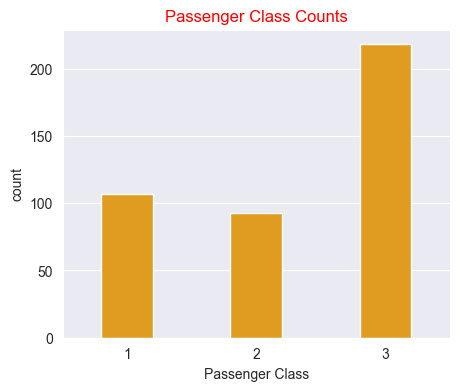

In [31]:
plt.figure(figsize=(5,4))
plt.title('Passenger Class Counts',color='red')
sns.countplot(data=df,x='Passenger Class',width=0.4,color='orange')

## Siblings or Spouse Analysis

In [32]:
df['SibSp'].value_counts()

SibSp
0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: count, dtype: int64

Text(0.5, 0, 'Number of Siblings or Spouse')

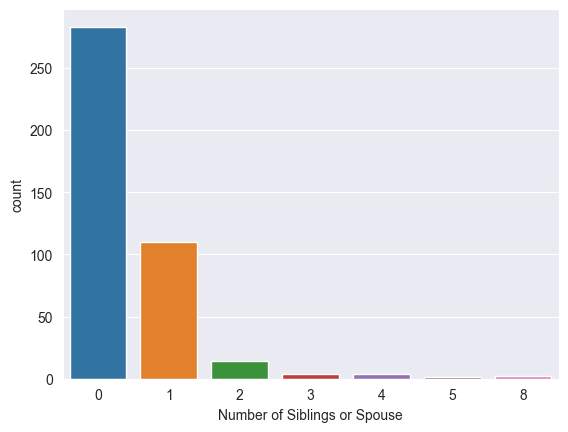

In [33]:
sns.countplot(data=df,x='SibSp')
plt.xlabel('Number of Siblings or Spouse')

## Embarked Analysis

### Renaming Port of Embarkation Values for better understanding

In [34]:
embark_dict={
    'Q':'Queenstown',
    'S':'Southampton',
    'C':'Cherbourg'
}
df['Embarked']=df['Embarked'].map(embark_dict)
df.head(3)

,PassengerId,Survived,Passenger Class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age-range,Fares group
0,892,Died,3,"Kelly, Mr. James",male,34.50,0,0,330911,7.83,NaN,Queenstown,30-39,0-50
1,893,Survived,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,363272,7.00,NaN,Southampton,40-49,0-50
2,894,Died,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,240276,9.69,NaN,Queenstown,60-69,0-50


In [35]:
df['Embarked'].value_counts()

Embarked
Southampton    270
Cherbourg      102
Queenstown      46
Name: count, dtype: int64

Text(0.5, 0, 'Port of Embarkation')

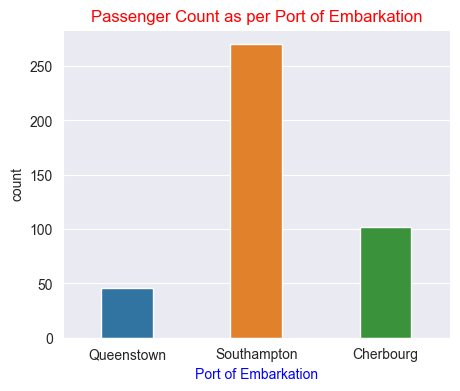

In [36]:
plt.figure(figsize=(5,4))
sns.countplot(data=df,x='Embarked',width=0.4)
plt.title('Passenger Count as per Port of Embarkation',color='red')
plt.xlabel('Port of Embarkation',color='blue')

## Cabin Info

In [37]:
df['Cabin'].isnull().value_counts()

Cabin
True     327
False     91
Name: count, dtype: int64

There are 327 null cabins assigned and 91 cabin assigned.

## Embarkation Port Analysis Based on Gender

In [38]:
embarked_df=df.groupby(['Embarked','Sex']).agg(
    count=('Sex','count')
)
embarked_df=embarked_df.reset_index()
embarked_df

,Embarked,Sex,count
0,Cherbourg,female,40
1,Cherbourg,male,62
2,Queenstown,female,24
3,Queenstown,male,22
4,Southampton,female,88
5,Southampton,male,182


Text(0, 0.5, 'Gender Count')

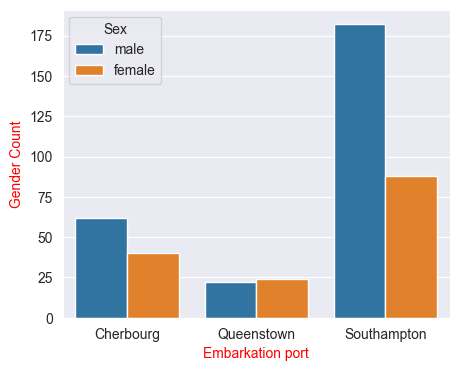

In [39]:
plt.figure(figsize=(5,4))
sns.barplot(data=embarked_df,x='Embarked',y='count',hue='Sex',hue_order=['male','female'])
plt.xlabel('Embarkation port',color='red')
plt.ylabel('Gender Count',color='red')

## Embarkation Port Analysis Based on passenger class

In [40]:
embarked_df2=df.groupby(['Embarked','Passenger Class']).agg(
    count=('Passenger Class','count')
)
embarked_df2=embarked_df2.reset_index()
embarked_df2

,Embarked,Passenger Class,count
0,Cherbourg,1,56
1,Cherbourg,2,11
2,Cherbourg,3,35
3,Queenstown,1,1
4,Queenstown,2,4
5,Queenstown,3,41
6,Southampton,1,50
7,Southampton,2,78
8,Southampton,3,142


Text(0, 0.5, 'Gender Count')

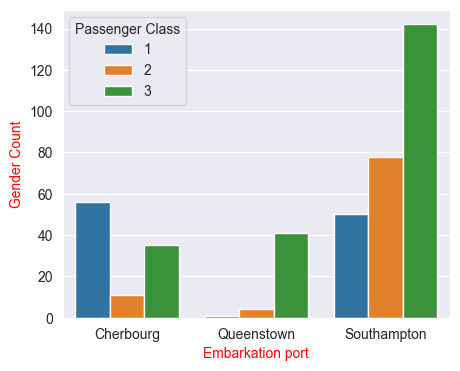

In [42]:
plt.figure(figsize=(5,4))
sns.barplot(data=embarked_df2,x='Embarked',y='count',hue='Passenger Class')
plt.xlabel('Embarkation port',color='red')
plt.ylabel('Gender Count',color='red')

## Gender count based on age-groups analysis

In [44]:
age_groupdf=df.groupby(['Age-range','Sex']).agg(
    count=('Sex','count')
)
age_groupdf=age_groupdf.reset_index()
age_groupdf

,Age-range,Sex,count
0,0-9,female,10
1,0-9,male,12
2,10-19,female,22
3,10-19,male,25
4,20-29,female,70
5,20-29,male,147
6,30-39,female,20
7,30-39,male,35
8,40-49,female,15
9,40-49,male,31


Text(0, 0.5, 'Count of Gender')

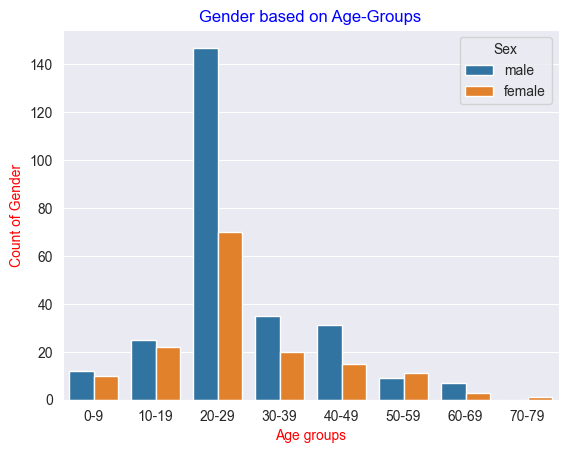

In [61]:
sns.set_style('darkgrid')
sns.barplot(data=age_groupdf,x='Age-range',y='count',hue='Sex',hue_order=['male','female'])
plt.title('Gender based on Age-Groups',color='blue')
plt.xlabel('Age groups',color='red')
plt.ylabel('Count of Gender',color='red')

## Survival count based on age-groups analysis

In [62]:
survivaldf=df.groupby(['Age-range','Survived']).agg(
    count=('Survived','count')
)
survivaldf=survivaldf.reset_index()
survivaldf

,Age-range,Survived,count
0,0-9,Died,12
1,0-9,Survived,10
2,10-19,Died,25
3,10-19,Survived,22
4,20-29,Died,147
5,20-29,Survived,70
6,30-39,Died,35
7,30-39,Survived,20
8,40-49,Died,31
9,40-49,Survived,15


Text(0, 0.5, 'Survival Count')

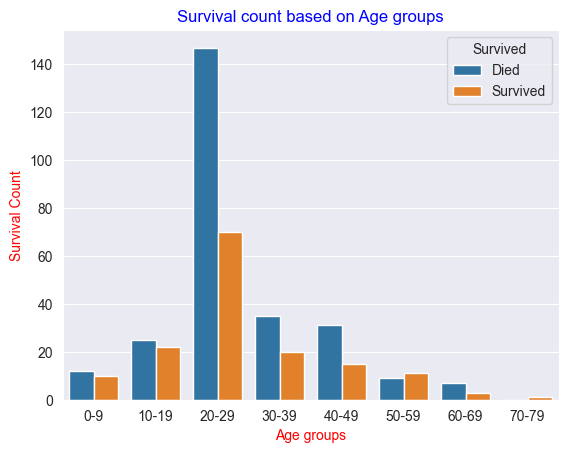

In [65]:
sns.barplot(data=survivaldf,x='Age-range',y='count',hue='Survived')
plt.title('Survival count based on Age groups',color='blue')
plt.xlabel('Age groups',color='red')
plt.ylabel('Survival Count',color='red')

## Swarm Plot embarked by age

c:\Users\atulp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 12.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: title={'center': 'Embarkation based on Age'}, xlabel='Embarkation Port', ylabel='Age'>

c:\Users\atulp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 17.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\atulp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 18.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\atulp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 6.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


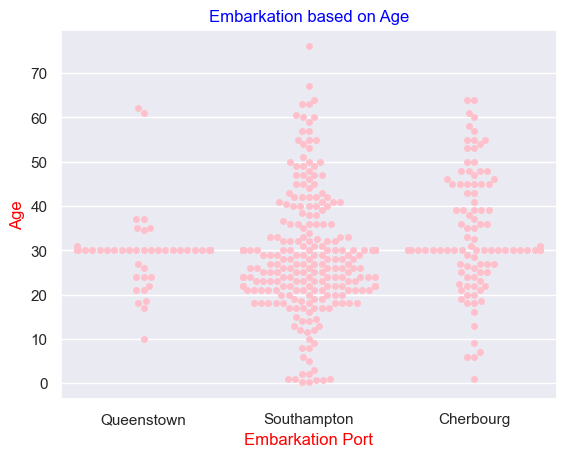

In [72]:
plt.xlabel('Embarkation Port',color='red')
plt.title('Embarkation based on Age',color='blue')
plt.ylabel('Age',color='red')
sns.swarmplot(data=df,x='Embarked',y='Age',color='pink')